In [91]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.express as ex
import os
import sys

drive.mount('/content/drive')
working_dir = '/content/drive/MyDrive/GL-AIML/Project1'

%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
def hist_box(data,feature,figsize=(12,7),kde=False,bins=None):
  '''

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  '''

  fs,(ax_box,ax_hist) = plt.subplots(nrows=2,
             sharex=True,
             figsize=(12,7),
             gridspec_kw={"height_ratios": (0.3, 0.7)})
  sns.boxplot(data=data,ax=ax_box,x=feature,showmeans=True,color='violet')
  if bins:
    sns.histplot(data=data,ax=ax_hist,x=feature,bins=bins,kde=kde)
  else:
    sns.histplot(data=data,ax=ax_hist,x=feature,kde=kde)
  ax_hist.axvline(data[feature].mean(), color="green", linestyle="--") ## draw a green dotted line of mean
  ax_hist.axvline(data[feature].median(), color="black", linestyle="-") ## draw a black straight line of median
  plt.show()

# **Reading datasets**


In [47]:
cardio = pd.read_csv('%s/CardioGoodFitness.csv'%working_dir) # load csv data file

### **Data description**

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very 
unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run


###**Displaying the first few rows**

In [48]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


###**Checking data shape & data types**

In [49]:
print ('### data shape ###\n%s rows & %s columns\n'%(cardio.shape))
print ('### data types ###')
cardio.info()

### data shape ###
180 rows & 9 columns

### data types ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* There are 3 object datatype columns with 4 numeric datatype columns
* None of the columns has null values ( imputation is not required )

#**Statistical summary for the numeric datatype columns**

In [50]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


* Considering the 25% percentile and 75% percentile of the age category, the majority of customers are in their 20s or 30s.
* 75% of customers use treadmill more than 3 times a week.
* 75% of customers gave a self rated fitness higher than 2 points.
* The average of miles customers run is located between the 50% percentile and 75% percentile of the data, indicating a bit right skew.
* Also miles run by customers are spread over a large range. Ranging from 21 to 360.



#**Univariate Analysis**

##**Numerical variables**

### **Observations on Age**


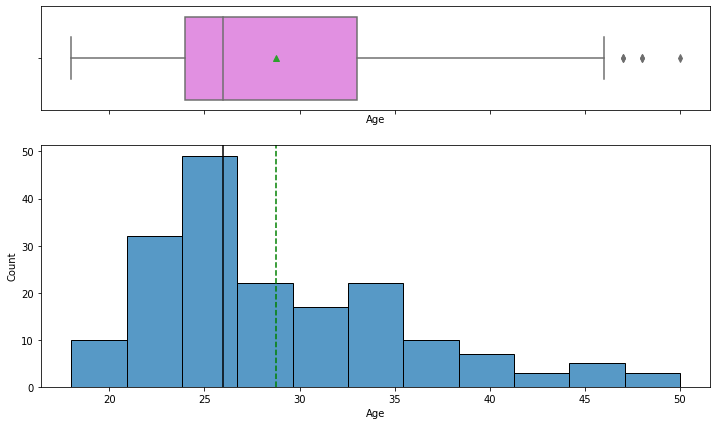

In [51]:
hist_box(data=cardio,feature='Age')

* The distibution of Age is right skewed.
* There are some outlier in Age variable.
* The median age of customers is close to 26.

###**Observations on Education**

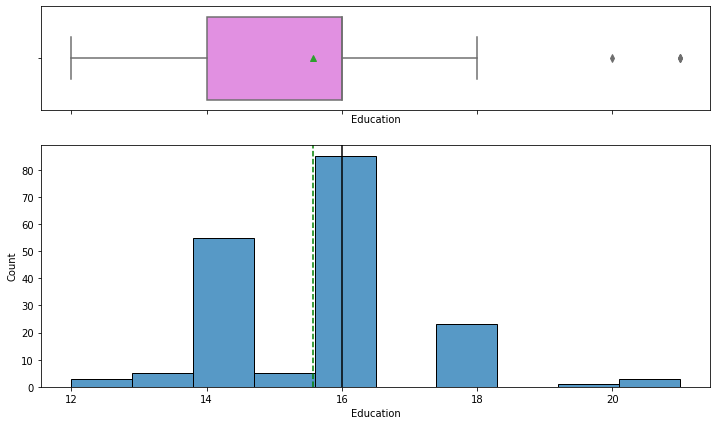

In [52]:
hist_box(data=cardio,feature='Education',bins=10)

* The distribution of educational attainment is not highly skewed but also not general normal distribution.
* The median of Education variable is 16.
* Some outliers were found in Education variable.

### **Observations on Usage**

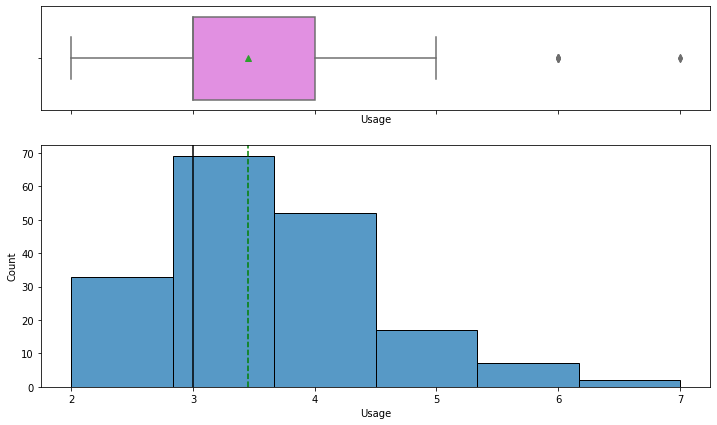

In [53]:
hist_box(data=cardio,feature='Usage',bins=6)

* The distribution of Usage variable is a right skew.
* The median of Usage variable is 3.
* Using treadmill more than 5 times a week is considered an outliers.

### **Observations on Fitness**

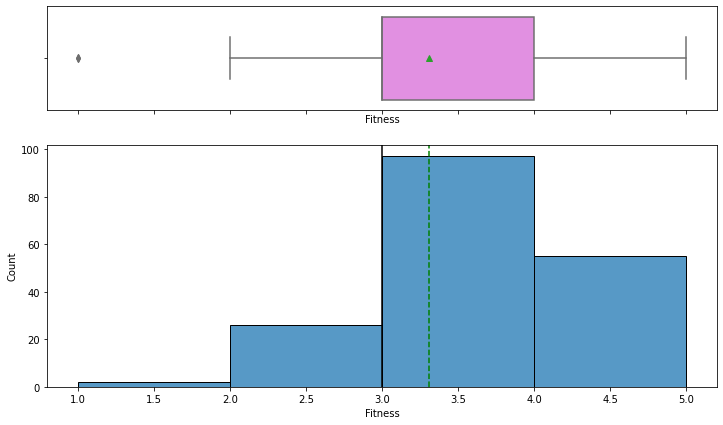

In [54]:
hist_box(data=cardio,feature='Fitness',bins=4) # score is range only from 2 to 5 ( min = 2, max = 5)

 * The median of self-rated fitness score is 3.

###**Observations on Income**

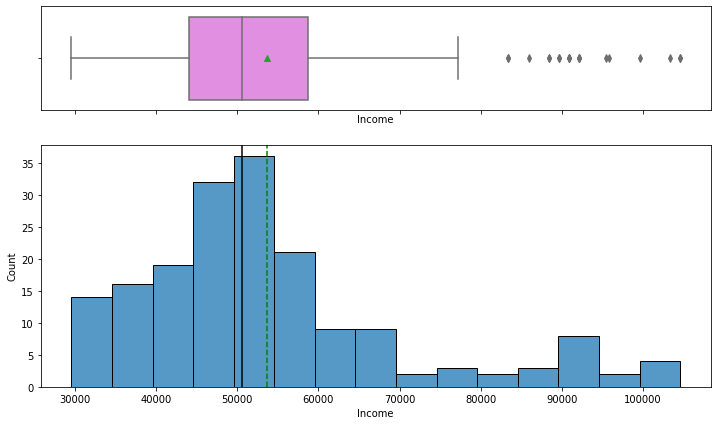

In [55]:
hist_box(data=cardio,feature='Income')

* The distribution of Income is right skewed.
* There are many outliers in this variable.
* The median of income is close to 50,000.

###**Observations of Miles**

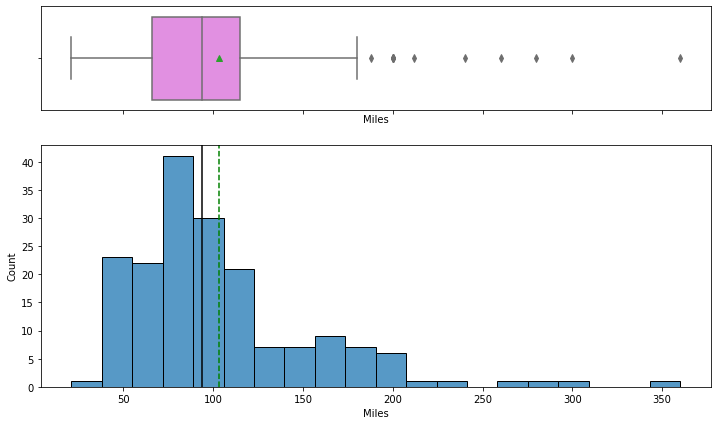

In [56]:
hist_box(data=cardio,feature='Miles')

* The distribution of Miles is highly right skewed.
* There are some outliers in this variable.
* The median of income is close to 100.

##**Categorical variables**

###**Observations on Product**

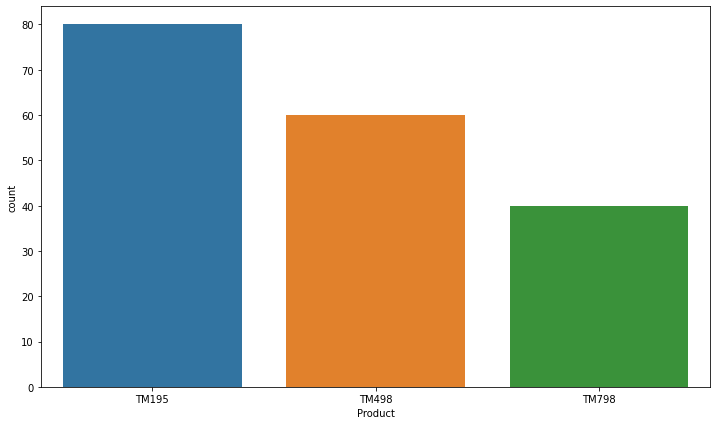

In [57]:
plt.figure(figsize=(12,7))
sns.countplot(data=cardio,x='Product')
plt.show()

* Treadmills sold the most in the order of model TM195, TM498, and TM798.
* The model TM195 sold twice as many as the model TM798.

###**Observations on Gender**

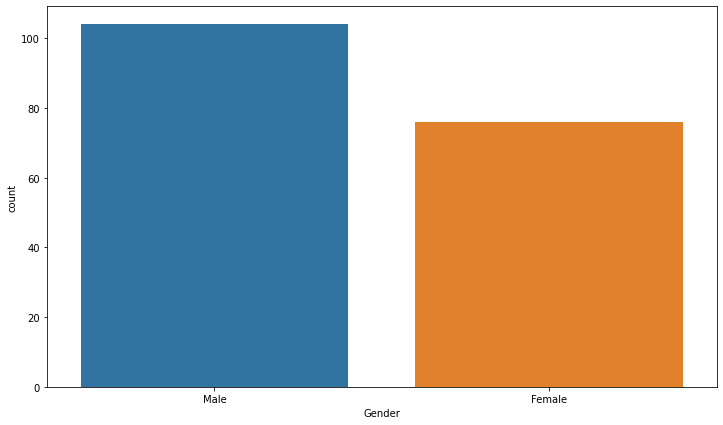

In [58]:
plt.figure(figsize=(12,7))
sns.countplot(data=cardio,x='Gender')
plt.show()


In [59]:
# count the number of customers by gender
male_cnt = cardio[cardio['Gender']=='Male'].shape[0]
female_cnt = cardio[cardio['Gender']=='Female'].shape[0]
print (male_cnt/female_cnt)

1.368421052631579


* The number of male customers is about 1.4 times that of female customers.

###**Observations on MaritalStatus**

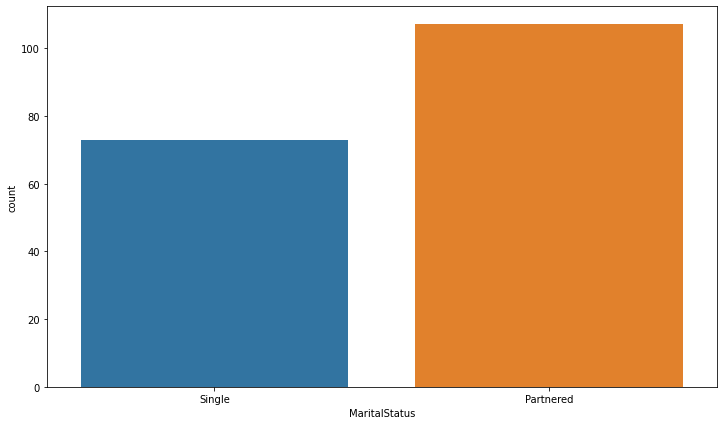

In [60]:
plt.figure(figsize=(12,7))
sns.countplot(data=cardio,x="MaritalStatus")
plt.show()

In [61]:
# count the number of customers by gender
partnered_cnt = cardio[cardio['MaritalStatus']=='Partnered'].shape[0]
single_cnt = cardio[cardio['MaritalStatus']=='Single'].shape[0]
print (partnered_cnt/single_cnt)

1.4657534246575343


* The number of partnered customers is about 1.5 times that of single customers.

#**Bivariate Analysis**

###**Relationship of Fitness with other variables**

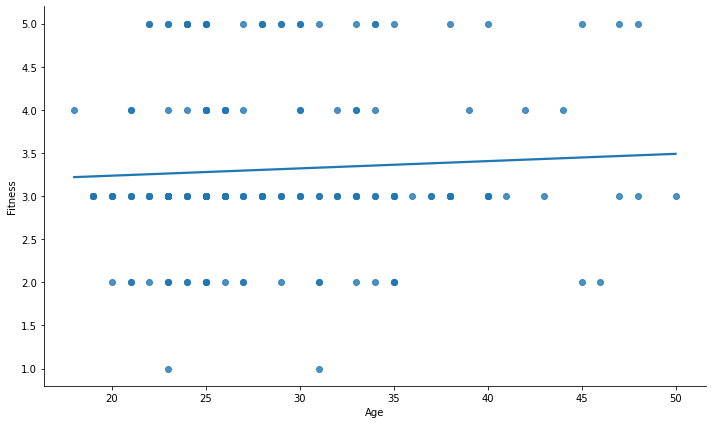

In [62]:
# Relationship between Age and Fitness.
sns.lmplot(data=cardio,x='Age',y='Fitness',height=6,aspect=5/3,ci=None)
plt.show()

* Age did not appear to affect the self rated fitness score.

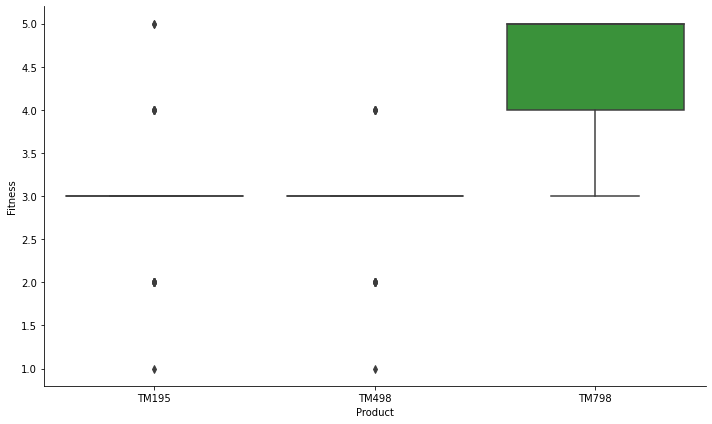

In [63]:
# Relationship between Fitness and Product
sns.catplot(data=cardio,x='Product',y='Fitness',kind='box',height=6,aspect=5/3)
plt.show()

In [64]:
# check the median of score in the model TM798
cardio[cardio['Product']=='TM798']['Fitness'].median()

5.0

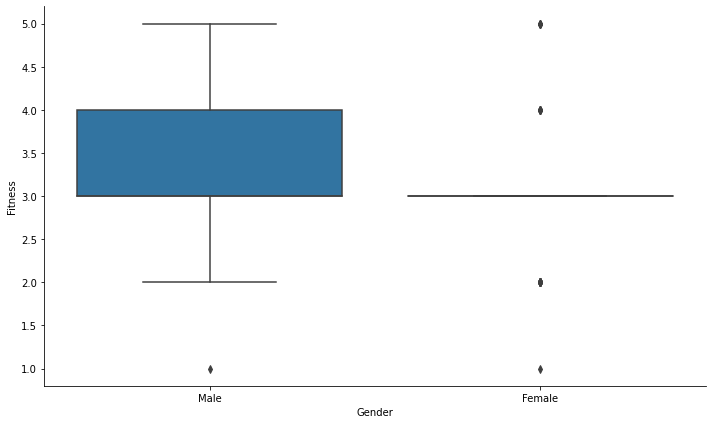

In [65]:
# Relationship between Fitness and Gender
sns.catplot(data=cardio,x='Gender',y='Fitness',kind='box',height=6,aspect=5/3)
plt.show()

* The self-rated score of male customers tends to be higher than that of female customers.

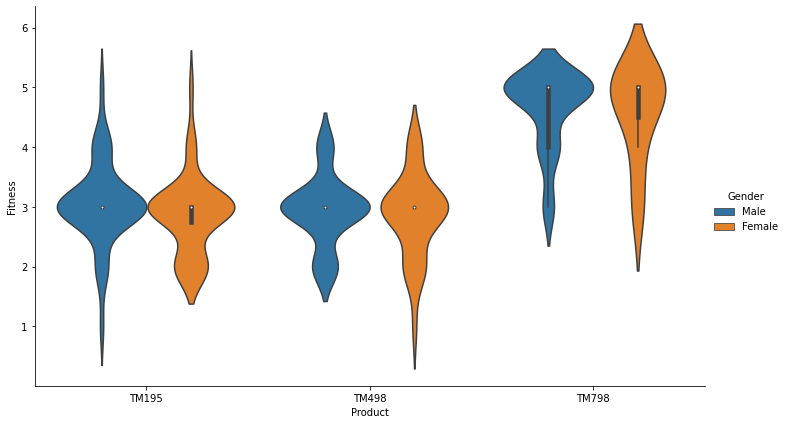

In [66]:
# Relationship between Fitness and Product by gender group
sns.catplot(data=cardio,x='Product',y='Fitness',kind='violin',hue='Gender',height=6,aspect=5/3)  ## hue='Gender' ; to remove Gender effect.
plt.show()

* The median of self rated fitness score of customers who purchased the TM798 model is 5, which is significantly different from the group of customers who purchased the other two models.

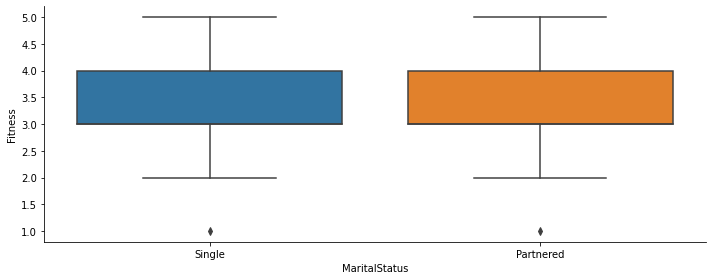

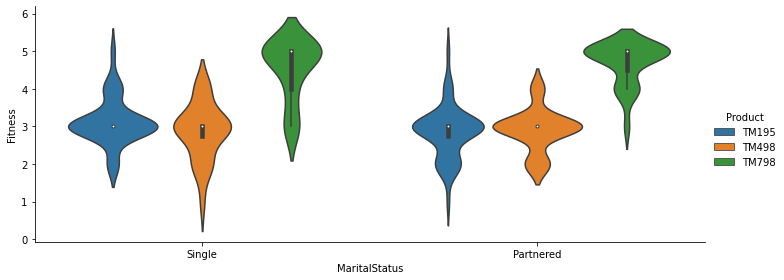

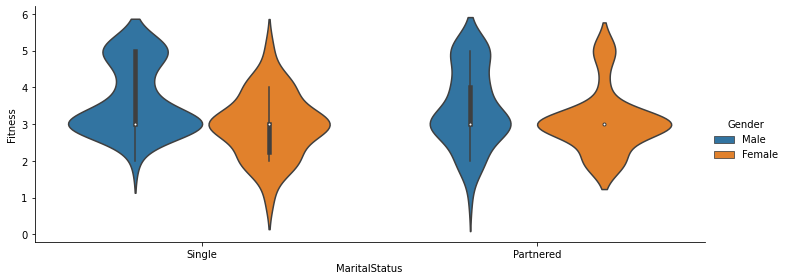

In [67]:
# Relationship between Fitness and MaritalStatus
sns.catplot(data=cardio,x='MaritalStatus',y='Fitness',kind='box',height=4,aspect=10/4)
plt.show()
# Relationship between Fitness and MaritalStatus by product group
sns.catplot(data=cardio,x='MaritalStatus',y='Fitness',kind='violin',hue='Product',height=4,aspect=10/4)  ## hue='Product' ; to remove Product effect.
plt.show()
# Relationship between Fitness and MaritalStatus by gender group
sns.catplot(data=cardio,x='MaritalStatus',y='Fitness',kind='violin',hue='Gender',height=4,aspect=10/4)  ## hue='Gender' ; to remove Gender effect.
plt.show()

* There seems to be no difference in self rated fitness score according to marital status.

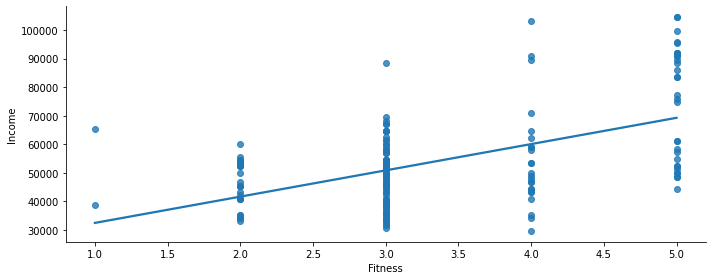

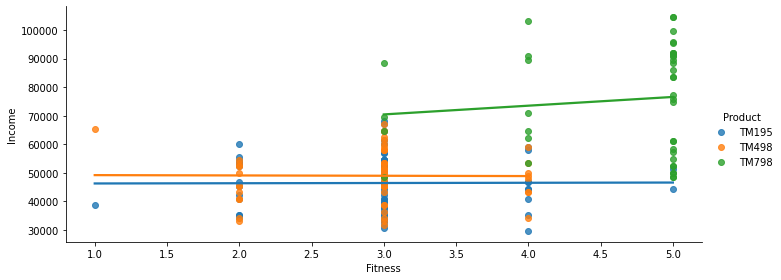

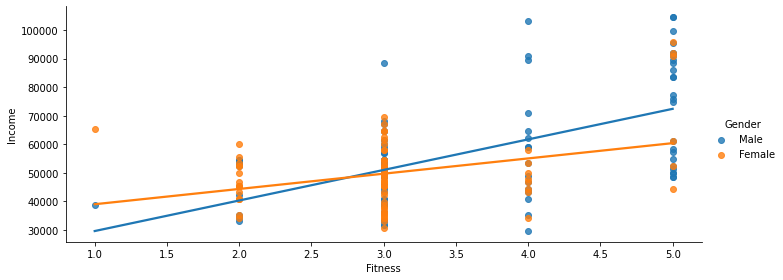

In [68]:
# Relationship between Fitness and Income
sns.lmplot(data=cardio,x='Fitness',y='Income',ci=None,height=4,aspect=10/4)
plt.show()
# Relationship between Fitness and Income by Product
sns.lmplot(data=cardio,x='Fitness',y='Income',height=4,hue='Product',ci=None,aspect=10/4) ## hue='Product' ; to remove Product effect.
plt.show()
# Relationship between Fitness and Income by Gender
sns.lmplot(data=cardio,x='Fitness',y='Income',height=4,hue='Gender',ci=None,aspect=10/4) ## hue='Gender' ; to remove Gender effect.
plt.show()

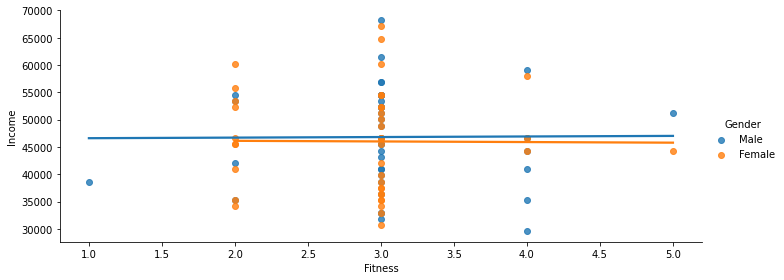

In [69]:
# Relationship between Fitness and Income by Gender in the model TM195 (the largest number of data )
sns.lmplot(data=cardio[cardio['Product']=='TM195'],x='Fitness',y='Income',height=4,hue='Gender',ci=None,aspect=10/4) ## hue='Gender' ; to remove Gender effect.
plt.show()

* While it may appear that there is a positive correlation between income and self rated fitness scores, there does not appear to be a significant correlation between income level and the scores, except for the effect of gender and model on the scores.

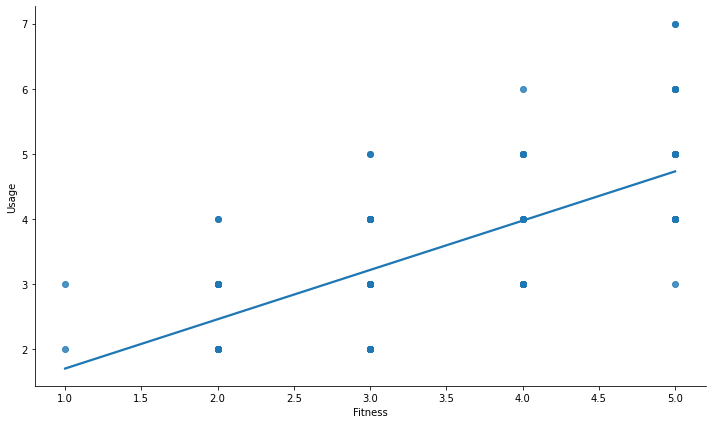

In [70]:
# Relationship between Fitness and Usage
sns.lmplot(data=cardio,x='Fitness',y='Usage',height=6,ci=None,aspect=5/3)
plt.show()

* Customers seem to be inclined to use the treadmill more often when they think their fitness is good.

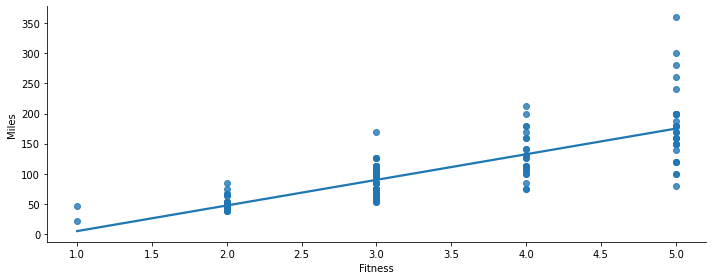

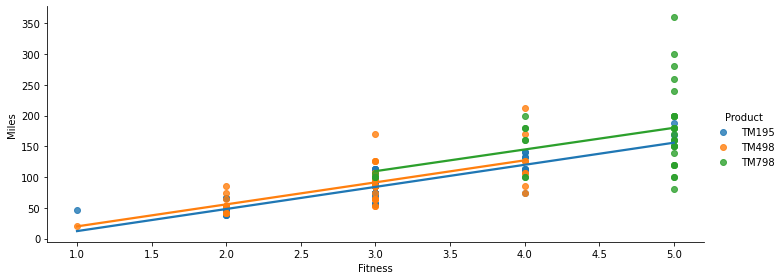

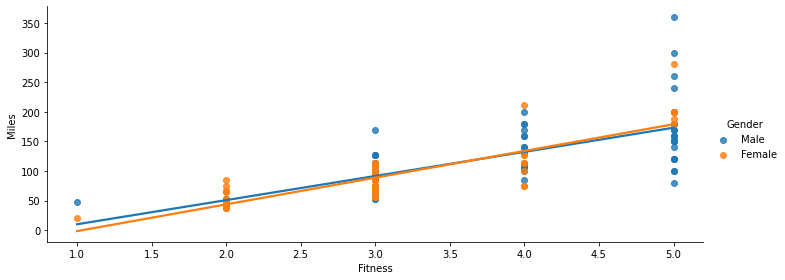

In [71]:
# Relationship between Fitness and Miles
sns.lmplot(data=cardio,x='Fitness',y='Miles',height=4,ci=None,aspect=10/4)
plt.show()
# Relationship between Fitness and Miles by Product
sns.lmplot(data=cardio,x='Fitness',y='Miles',height=4,aspect=10/4,ci=None,hue='Product') ## hue='Product' ; to remove Product effect.
plt.show()
# Relationship between Fitness and Miles by Gender
sns.lmplot(data=cardio,x='Fitness',y='Miles',height=4,aspect=10/4,ci=None,hue='Gender') ## hue='Gender' ; to remove Gender effect.
plt.show()

* Similary to the weekly plan, customers seem to tend to use the treadmill more when they think their fitness is good.

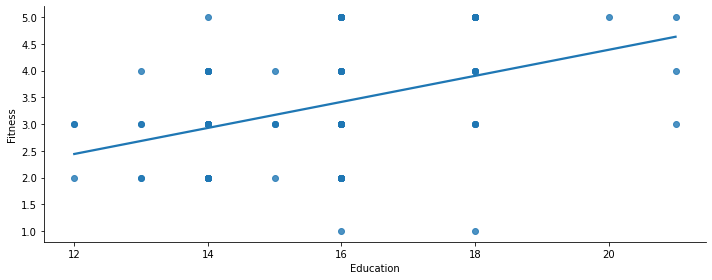

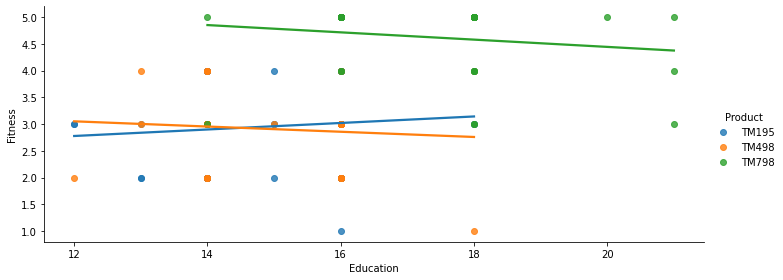

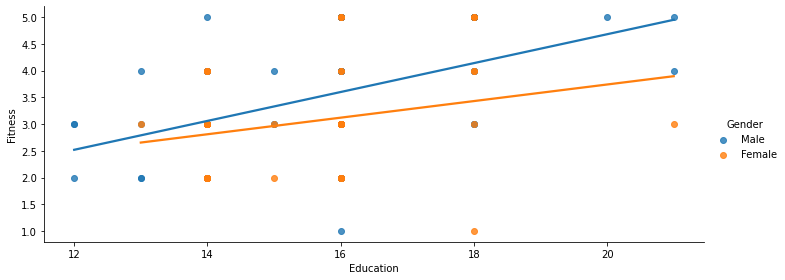

In [72]:
# Relationship between Fitness and Education
sns.lmplot(data=cardio,x='Education',y='Fitness',height=4,ci=None,aspect=10/4)
plt.show()
# Relationship between Fitness and Education by Product
sns.lmplot(data=cardio,x='Education',y='Fitness',height=4,aspect=10/4,hue='Product',ci=None,) ## hue='Product' ; to remove Product effect.
plt.show()
# Relationship between Fitness and Education by Gender
sns.lmplot(data=cardio,x='Education',y='Fitness',height=4,aspect=10/4,hue='Gender',ci=None) ## hue='Gender' ; to remove Gender effect.
plt.show()

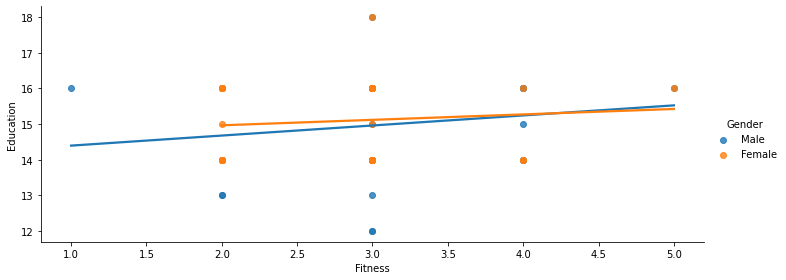

In [73]:
# Relationship between Fitness and Education by Gender in the model TM195 (the largest number of data )
sns.lmplot(data=cardio[cardio['Product']=='TM195'],x='Fitness',y='Education',height=4,hue='Gender',aspect=10/4,ci=None) ## hue='Gender' ; to remove Gender effect.
plt.show()

* As a result, there does not appear to be a significant correlation between education level and the self rated fitness scores, except for the effect of model on the scores.

### **Relationship of Product with other variables**

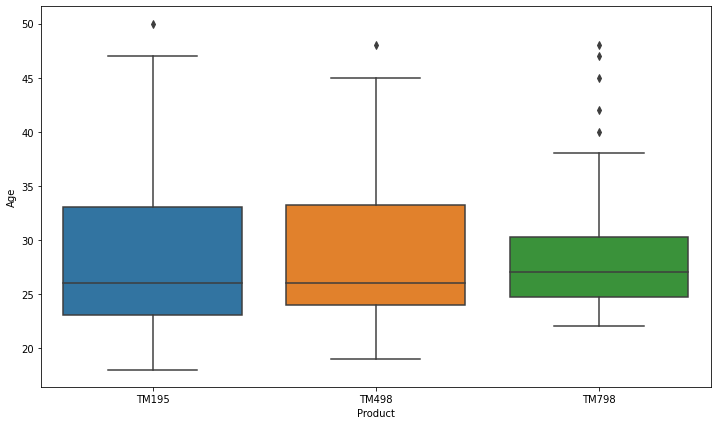

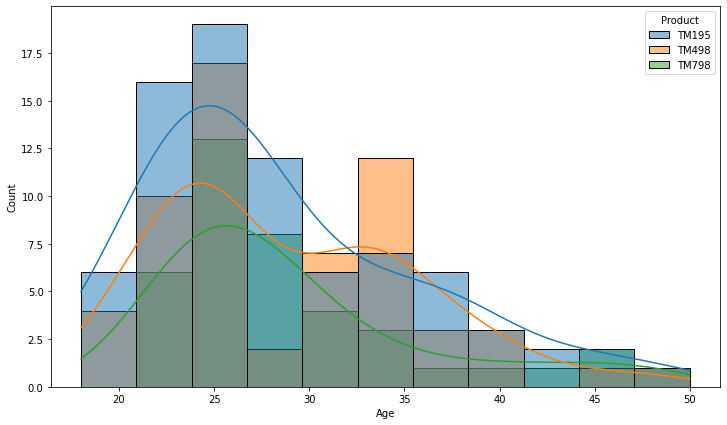

In [74]:
# Relationship between Age and Product.
plt.figure(figsize=(12,7))
sns.boxplot(data=cardio,x='Product',y='Age')
plt.show()
plt.figure(figsize=(12,7))
sns.histplot(data=cardio,x='Age',hue='Product',kde=True)
plt.show()

* Age does not seem to affect product selection.
* The main customer age group is in their 20s.

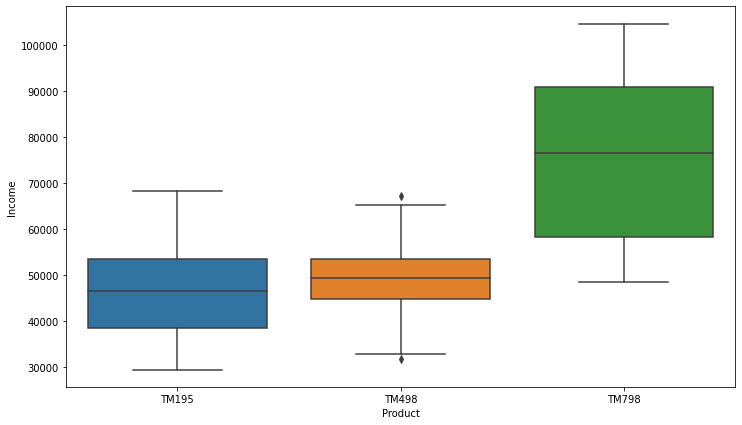

In [75]:
# Relationship between Income and Product.
plt.figure(figsize=(12,7))
sns.boxplot(data=cardio,x='Product',y='Income')
plt.show()

* Customers buying model TM798 tend to have higher incomes than customers buying other products.


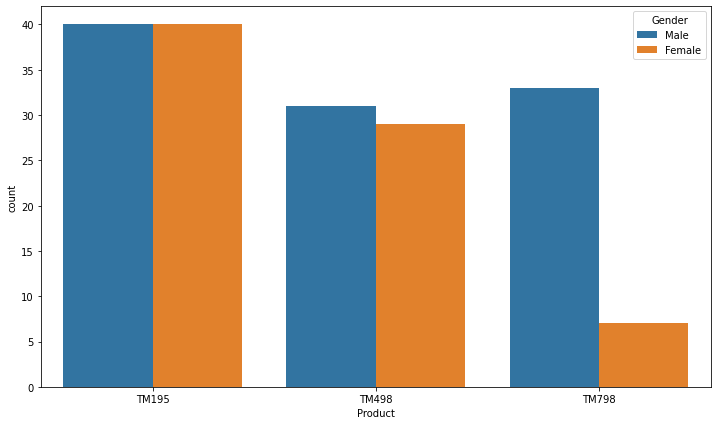

In [76]:
# Relationship between Gender and Product.
plt.figure(figsize=(12,7))
sns.countplot(data=cardio,x='Product',hue='Gender')
plt.show()

* While the model TM195 and TM498 have a similar male and female customer base, the model TM798 has a predominantly male customer base.

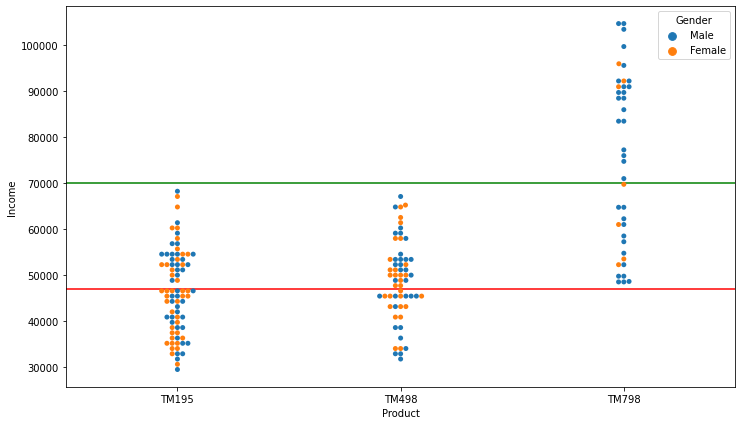

In [77]:
# Relationship between Gender and Income by Product.
plt.figure(figsize=(12,7))
sns.swarmplot(data=cardio,x='Product',y='Income',hue='Gender')
plt.axhline(70000,color='green')
plt.axhline(47000,color='red')
plt.show()

* Male customers appear to have more high-income customers than female customers.
* Customers with an income of 70,000 or more purchased only the model TM798, and customers under 47,000 did not.
* There appears to be a price entry barrier to purchasing the model TM798.

In [78]:
# Check purchaing ratio of the model TM798 by gender group with income between 47000 and 70000 .
male_mid_income_df = cardio[(cardio['Gender']=='Male') & (cardio['Income'] < 70000) & (cardio['Income'] > 47000)]
female_mid_income_df = cardio[(cardio['Gender']=='Female') & (cardio['Income'] < 70000) & (cardio['Income'] > 47000)]
male_mid_income_df_cnt = male_mid_income_df.shape[0]
female_mid_income_df_cnt = female_mid_income_df.shape[0]
male_mid_income_tm798_cnt = male_mid_income_df[male_mid_income_df['Product']=='TM798'].shape[0]
female_mid_income_tm798_cnt = female_mid_income_df[female_mid_income_df['Product']=='TM798'].shape[0]

print ('Purchaing ratio of the model TM798 in male with mid income: %s'%format(male_mid_income_tm798_cnt/male_mid_income_df_cnt,'0.2f'))
print ('Purchaing ratio of the model TM798 in female with mid income: %s'%format(female_mid_income_tm798_cnt/female_mid_income_df_cnt,'0.2f'))

Purchaing ratio of the model TM798 in male with mid income: 0.26
Purchaing ratio of the model TM798 in female with mid income: 0.11


* In the income range that does not exclude specific models, male customers tend to purchase more the model TM798 than female customers.

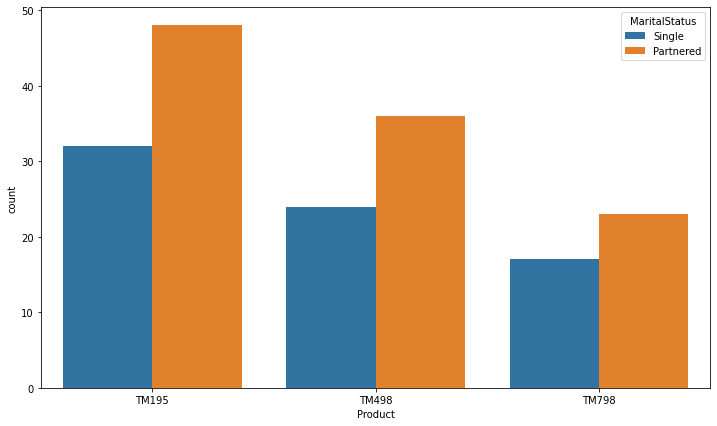

In [79]:
# Relationship between MatrialStatus and Product.
plt.figure(figsize=(12,7))
sns.countplot(data=cardio,x='Product',hue='MaritalStatus')
plt.show()

* Marital status does not seem to have a significant effect on model selection.

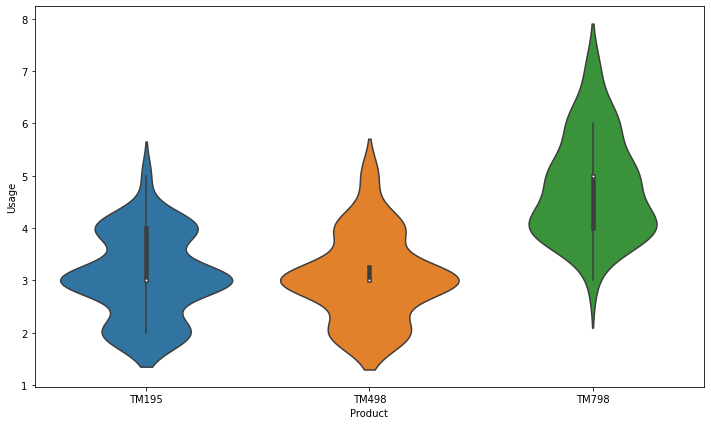

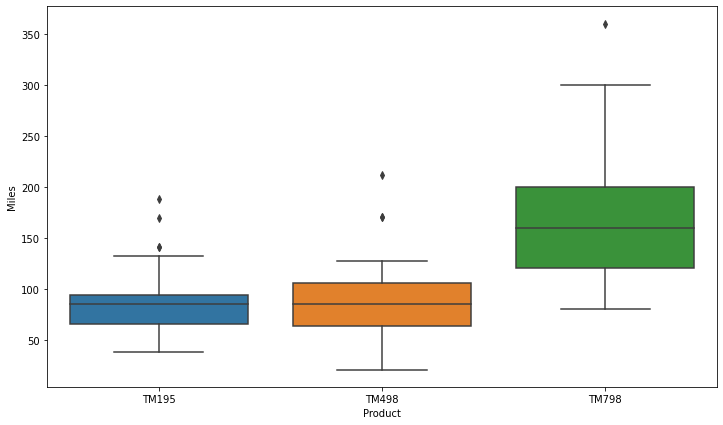

In [80]:
# Relationship between Usage and Product.
plt.figure(figsize=(12,7))
sns.violinplot(data=cardio,x='Product',y='Usage')
plt.show()
# Relationship between Miles and Product.
plt.figure(figsize=(12,7))
sns.boxplot(data=cardio,x='Product',y='Miles')
plt.show()

* Male customers showed a slightly higher weekly usage plan and expected mileage compared to female customers.

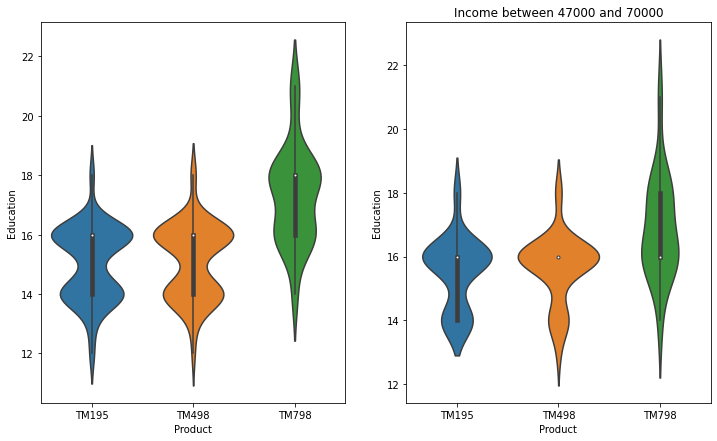

In [81]:
# Relationship between Education and Product.
fig,ax = plt.subplots(ncols=2,figsize=(12,7))
sns.violinplot(data=cardio,x='Product',y='Education',ax=ax[0])
sns.violinplot(data=cardio[(cardio['Income'] < 70000) & (cardio['Income'] > 47000)],x='Product',y='Education',ax=ax[1])
ax[1].set_title('Income between 47000 and 70000')
plt.show()

* Even excluding the effect of income on product purchases, the average level of education of customers who purchased the TM798 tends to be higher.

### **Relationship of Gender with other variables**


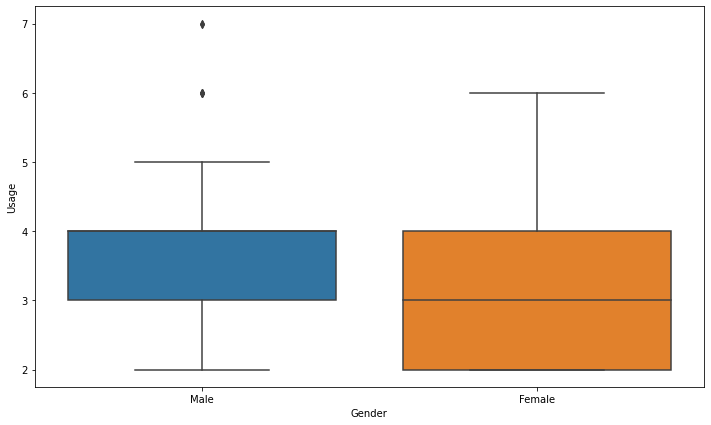

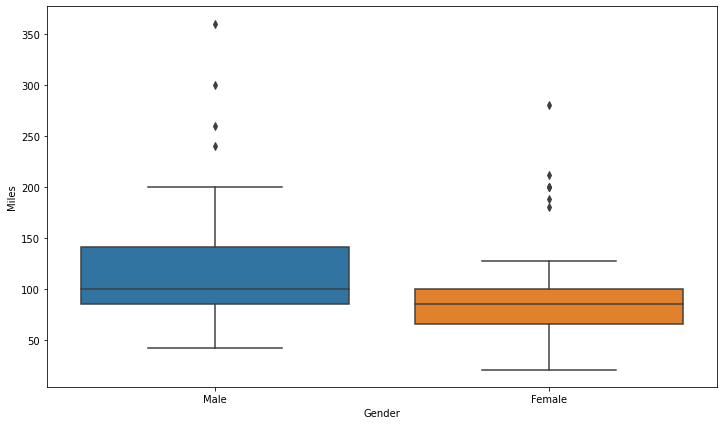

In [82]:
# Relationship between Usage and Gender.
plt.figure(figsize=(12,7))
sns.boxplot(data=cardio,x='Gender',y='Usage')
plt.show()
# Relationship between Miles and Gender.
plt.figure(figsize=(12,7))
sns.boxplot(data=cardio,x='Gender',y='Miles')
plt.show()

###**Relationship of Age with other variables**

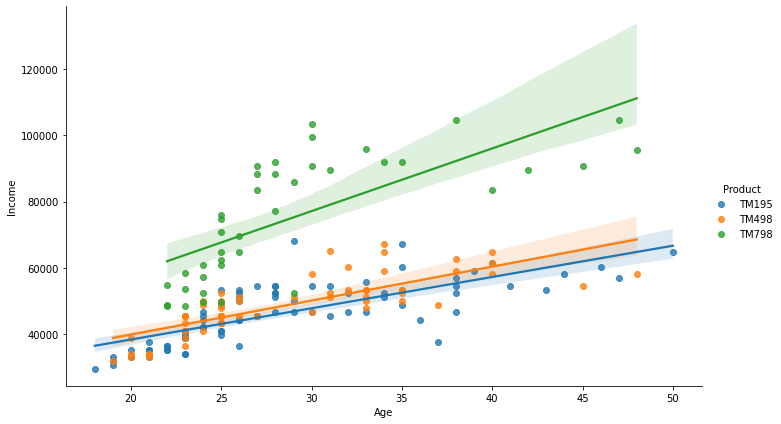

In [83]:
# Relationship between Age and Income by product
sns.lmplot(data=cardio,x='Age',y='Income',height=6,aspect=5/3,hue='Product')
plt.show()

* As expected, the older the customer, the higher their income tends to be. 
* Interestingly, the tendency to buy the model TM798 is more pronounced when the income is relatively higher than the same age group. .

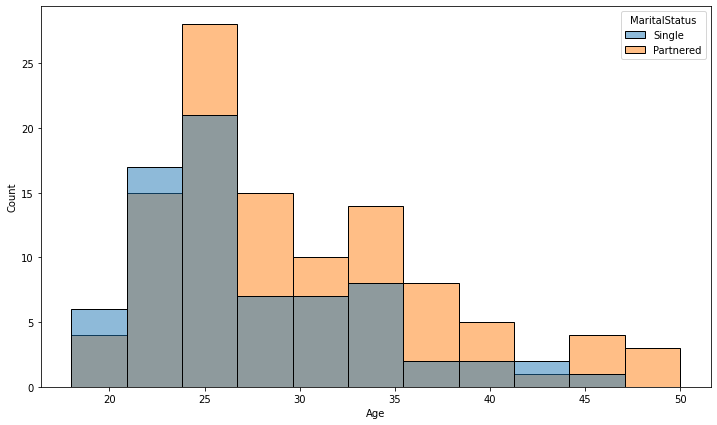

In [84]:
# Relationship between Age and MaritalStatus
plt.figure(figsize=(12,7))
sns.histplot(data=cardio,x='Age',hue='MaritalStatus')
plt.show()

* There are more partnered customers than single customers in all age groups except in their early 20s.

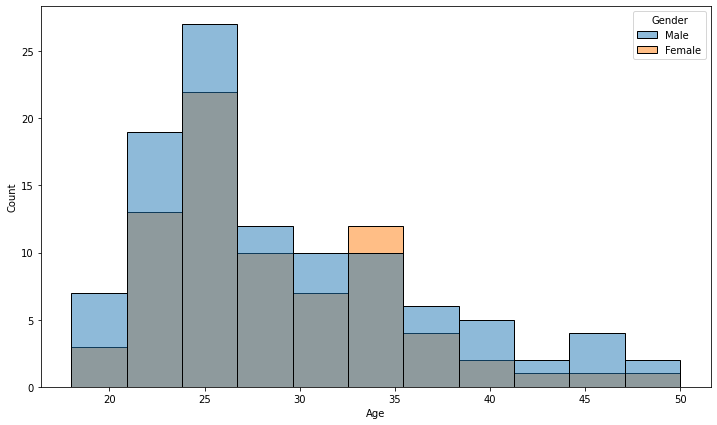

In [85]:
# Relationship between Age and Gender
plt.figure(figsize=(12,7))
sns.histplot(data=cardio,x='Age',hue='Gender')
plt.show()

###**Correlation between numerical variables**

In [86]:
# Creating a 2D matrix with correlation plots
corr_matrix = cardio.corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


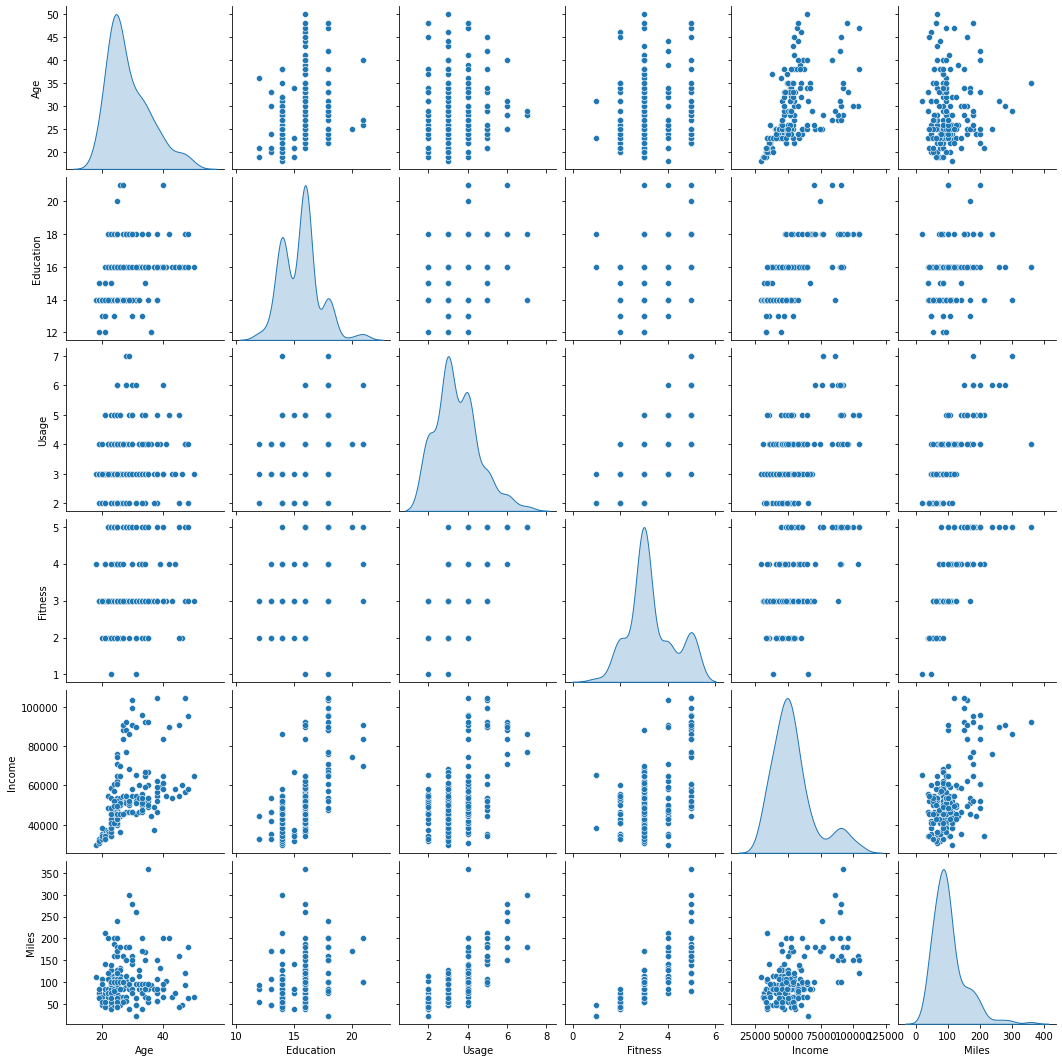

In [87]:
sns.pairplot(data=cardio,diag_kind='kde')
plt.show()

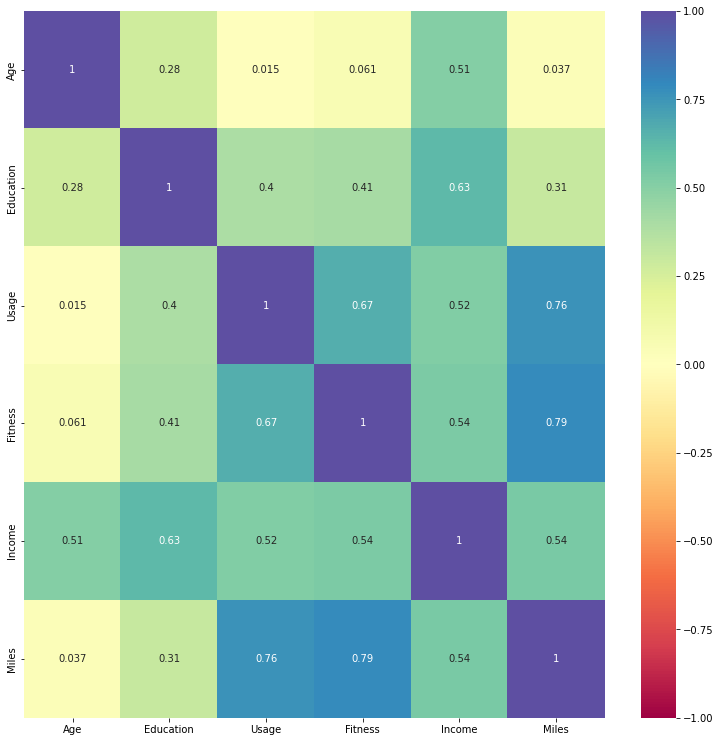

In [88]:
# Plotting heatmap
plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* The two variables with the highest correlation are Fitness and Miles.
* Age shows a low correlation with most of the other features except for income.

#**Conclusion**

 The dataset extracted from customer profile by group has been analysed to understand the trend of product satisfaction which could help the company in targeting new customes. 

 With the help of descriptive analysis and visualisations, some insights have been drawn as below:

1. The most popular product is the model TM195 and the least popular product is the model TM798.
2. The main customer base of the company is partnered men in their 20s and 30s.
3. The self rated fitness score, expected frequency of use, and Miles expected to run by customers who purchased the model TM798 tended to be higher than those of other models.
4. This indicates that the model TM798 is suitable for customers who are active in sports.
5. The model TM798 is favored by relatively high-income customers and not by low-income customers.
6. This indicates that there is a price barrier to buying the model TM798.

#**Recommendations**

1. Focusing on promoting the model TM195 for female customers with a relatively less active compared to males will be helpful in acquiring new customers.
2. Due to their relatively high income and high health concerns, there appears to be a shortage of prospective mid-30s customers for the model TM798. Therefore, it is necessary to further strengthen public relations for the relevant customer base.
3. Since price entry barriers have been identified for purchasing the model TM798 model, lowering the selling price or conducting promotions will help to secure new customers.